## Recursión ingenua

In [ ]:
def fib(n, nivel=0):
    if n==0 or n==1:
        print(" "*nivel,"fib({}) = {}".format(n, 1))
        return 1
    print(" "*nivel,"fib({}) [".format(n))
    result = fib(n-1,nivel+4) + fib(n-2,nivel+4)
    print(" "*nivel,"] = {}".format(n,result))
    return result

In [ ]:
fib(5)

 fib(5) [
     fib(4) [
         fib(3) [
             fib(2) [
                 fib(1) = 1
                 fib(0) = 1
             ] = 2
             fib(1) = 1
         ] = 3
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
     ] = 4
     fib(3) [
         fib(2) [
             fib(1) = 1
             fib(0) = 1
         ] = 2
         fib(1) = 1
     ] = 3
 ] = 5


8

In [ ]:
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

In [ ]:
from functools import lru_cache

@lru_cache()
def fib(n):
    if n < 2:
        return n
    return fib(n-1) + fib(n-2)

In [ ]:
%time fib(35)

CPU times: user 969 µs, sys: 0 ns, total: 969 µs
Wall time: 1.01 ms


9227465

In [ ]:
def fib(n, mem = {}):
    if n < 2:
        return n
    if n in mem:
        return mem[n]
    res = fib(n-1, mem) + fib(n-2, mem)
    mem[n] = res
    return res

In [ ]:
%time fib(350)

CPU times: user 1.18 ms, sys: 152 µs, total: 1.33 ms
Wall time: 1.34 ms


6254449428820551641549772190170184190608177514674331726439961915653414425

# Problema de la mochila 0/1

¿Cómo decide un ladrón qué se lleva?

Es difícil la vida de un ladrón.  A veces se encuentra en una casa con muchas cosas que llevarse y con tan solo un saco o mochila pequeña.  Si carga mucho se romperá y se quedará sin nada. Pero ¿qué elegir?  

Este problema es un clásico, el problema de la mochila 0/1.  El 0/1 se refiere a que solo hay dos opciones para cada cosa, cogerla o no.  No hay posibilidad de cogerla a medias.

Este problema no tiene solución en tiempo polinómico. El un problema cuya solución óptima se calcula en tiempo exponencial.  Por ejemplo, se puede usar enumeración exhaustiva.


# Problema de la mochila 0/1

* Elemento representado por (valor, peso)
* Mochila acomoda elementos hasta peso $w$
* Sea $I$ el vector de elementos disponibles
* Sea $V$ vector que indica si se coge o no
* Encontrar V que maximiza
	$$\sum V_i \cdot I_i^{valor}$$
    
  sujeto a la restricción

	$$\sum V_i \cdot I_i^{peso} \leq w$$



In [15]:
def prueba0():
    nombres = ['a', 'b', 'c', 'd']
    valores = [6, 7, 8, 9]
    pesos   = [3, 3, 2, 5]
    elems   = zip(nombres, valores, pesos)
    val, saco = mochila01(list(elems), 5)
    for e in saco:
        print(e)
    print('Valor total =', val)

def valor(e): return e[1]
def peso(e): return e[2]

In [20]:
def mochila01(elems, w):
    maxv = 0
    mejor = tuple()
    for i in range(2**len(elems)):
        nuevo = saco(elems, i)
        nuevov = valorSaco(nuevo)
        if nuevov > maxv and pesoSaco(nuevo) <= w:
            maxv, mejor = nuevov, nuevo
    return maxv, mejor


def saco(elems, n):
    return tuple(e for i,e in enumerate(elems) if bitSet(n, i))

def valorSaco(elems):
    return sum(valor(e) for e in elems)

def pesoSaco(elems):
    return sum(peso(e) for e in elems)

def bitSet(n, b):
    return (n & (1<<b)) != 0


In [21]:
prueba0()

('b', 7, 3)
('c', 8, 2)
Valor total = 15


# Otra forma: Arbol de decisión

<img src="https://github.com/FranciscoMoya/informatica-nb/blob/master/2019/diag/decision-tree.svg?raw=1" width="50%" align="right" style="display:float;"/>

* Arbol binario
* Cada nodo con una tupla
   * Elementos a coger
   * Elementos que no se ha tomado decisión
   * *Valor de elementos a coger*
   * *Espacio disponible aún*
* Izquierda: toma $e_i$
* Derecha: no toma $e_i$


In [ ]:
%%file diag/decision-tree.bd
blockdiag {
    default_fontsize = 18
    default_node_color = "orange"

    E -> E0
    E -> E1 [label="toma E0", fontsize=10]
    E0 -> E00
    E0 -> E01 [label="toma E1", fontsize=10]
    E1 -> E10
    E1 -> E11 [label="toma E1", fontsize=10]
    //E00 -> E000
    //E00 -> E001
    //E01 -> E010
    //E01 -> E011
    //E10 -> E100
    //E10 -> E101
    //E11 -> E110
    //E11 -> E111

    E,E0,E1,E00,E01,E10,E11 [width = 50, shape=roundedbox]
    //E000,E001,E010,E011,E100,E101,E110,E111 [width = 50, shape=roundedbox]
    E [label=""]
    E0 [label="0"]
    E1 [label="1"]
    E00 [label="00"]
    E01 [label="01"]
    E10 [label="10"]
    E11 [label="11"]
    //E000 [label="000"]
    //E001 [label="001"]
    //E010 [label="010"]
    //E011 [label="011"]
    //E100 [label="100"]
    //E101 [label="101"]
    //E110 [label="110"]
    //E111 [label="111"]
}

Overwriting diag/decision-tree.bd


In [ ]:
!blockdiag -Tsvg diag/decision-tree.bd

/bin/sh: blockdiag: command not found


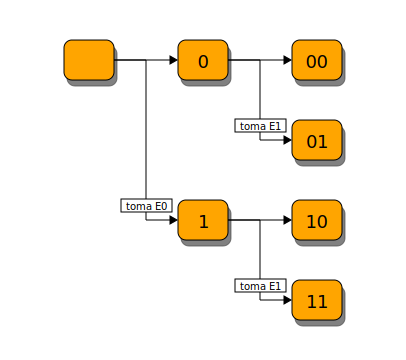

In [ ]:
from IPython.display import SVG

SVG('diag/decision-tree.svg')

In [32]:
def mochila01(pend, libre, memo= {}):
  if (len(pend), libre) in memo:
    return memo[(len(pend), libre)]
  ret = elegir(pend, libre, memo)
  memo[(len(pend), libre)] = ret
  return ret

def elegir(pend, libre, memo):
    if pend == [] or libre == 0:
        return (0, ())
    if peso(pend[0]) > libre:
        return mochila01(pend[1:], libre, memo)
    elem = pend[0]
    val1, saco1 = mochila01(pend[1:],
                            libre - peso(elem), memo)
    val1 += valor(elem)
    saco1 += (elem,)
    val0, saco0 = mochila01(pend[1:], libre, memo)
    if val1 > val0:
        return (val1, saco1)
    return (val0, saco0)

In [23]:
prueba0()

('c', 8, 2)
('b', 7, 3)
Valor total = 15


In [28]:
import random

def constr_elems(n, valMax, pesoMax):
    return [ (str(i), 
              random.randint(1, valMax),
              random.randint(1, pesoMax)) \
             for i in range(n) ]

def prueba1(n):
    elems = constr_elems(n, 10, 10)
    val, saco = mochila01(elems, 40)
    print ('Contenido:', elems)
    print ('Valor total:', val)

In [38]:
prueba1(800)

Contenido: [('0', 1, 4), ('1', 1, 3), ('2', 2, 10), ('3', 4, 1), ('4', 5, 4), ('5', 10, 9), ('6', 10, 4), ('7', 4, 1), ('8', 7, 9), ('9', 1, 6), ('10', 5, 6), ('11', 2, 3), ('12', 7, 9), ('13', 10, 10), ('14', 4, 3), ('15', 3, 5), ('16', 9, 3), ('17', 2, 10), ('18', 4, 1), ('19', 9, 9), ('20', 4, 8), ('21', 10, 2), ('22', 9, 2), ('23', 10, 10), ('24', 2, 3), ('25', 8, 6), ('26', 2, 4), ('27', 3, 7), ('28', 3, 1), ('29', 4, 4), ('30', 10, 10), ('31', 9, 8), ('32', 7, 6), ('33', 2, 9), ('34', 6, 9), ('35', 7, 4), ('36', 8, 4), ('37', 7, 9), ('38', 10, 10), ('39', 3, 8), ('40', 6, 9), ('41', 10, 7), ('42', 6, 7), ('43', 1, 1), ('44', 5, 1), ('45', 9, 7), ('46', 6, 8), ('47', 9, 10), ('48', 6, 6), ('49', 2, 3), ('50', 3, 3), ('51', 1, 1), ('52', 5, 6), ('53', 1, 1), ('54', 9, 2), ('55', 6, 6), ('56', 1, 9), ('57', 4, 7), ('58', 4, 4), ('59', 6, 3), ('60', 9, 10), ('61', 3, 1), ('62', 2, 9), ('63', 6, 1), ('64', 8, 6), ('65', 4, 4), ('66', 3, 5), ('67', 5, 2), ('68', 9, 4), ('69', 3, 4), ('

In [40]:
import sys
sys.setrecursionlimit(1000000)

In [43]:
prueba1(8000)

Contenido: [('0', 8, 9), ('1', 9, 7), ('2', 4, 9), ('3', 10, 2), ('4', 4, 2), ('5', 8, 9), ('6', 9, 2), ('7', 10, 10), ('8', 2, 7), ('9', 3, 1), ('10', 1, 6), ('11', 8, 1), ('12', 6, 7), ('13', 1, 6), ('14', 6, 10), ('15', 6, 2), ('16', 4, 9), ('17', 9, 6), ('18', 7, 2), ('19', 2, 9), ('20', 6, 8), ('21', 1, 4), ('22', 2, 8), ('23', 7, 2), ('24', 5, 6), ('25', 9, 4), ('26', 9, 7), ('27', 7, 6), ('28', 10, 5), ('29', 3, 7), ('30', 1, 10), ('31', 7, 2), ('32', 9, 1), ('33', 3, 1), ('34', 9, 4), ('35', 2, 7), ('36', 9, 2), ('37', 5, 3), ('38', 1, 2), ('39', 8, 10), ('40', 9, 4), ('41', 4, 7), ('42', 5, 10), ('43', 5, 2), ('44', 10, 9), ('45', 7, 4), ('46', 6, 1), ('47', 3, 10), ('48', 3, 7), ('49', 6, 3), ('50', 2, 3), ('51', 3, 3), ('52', 4, 6), ('53', 6, 4), ('54', 8, 7), ('55', 6, 6), ('56', 7, 1), ('57', 4, 1), ('58', 4, 3), ('59', 8, 10), ('60', 4, 2), ('61', 7, 9), ('62', 9, 3), ('63', 3, 7), ('64', 3, 4), ('65', 2, 9), ('66', 10, 5), ('67', 7, 10), ('68', 5, 5), ('69', 8, 2), ('70'